---
title: 👀Code-4-ML-Learning
password: ""
tags:
  - 人工智能
  - 机器学习
  - 信息论
katex: false
comments: true
aside: true
date: 2022-04-11 15:07:22
cover: https://www.helloimg.com/images/2022/04/07/RsEzqc.png
top_img:
---

# Code-4-ML-Learning

<!--
 * @?: *********************************************************************
 * @Author: Weidows
 * @LastEditors: Weidows
 * @LastEditTime: 2022-02-23 02:28:46
 * @FilePath: \Blog-private\scaffolds\post.md
 * @Description:
 * @!: *********************************************************************
-->

## 序

此文为其他文章的代码部分:

> [🐊All-about-AI](../../../AI/AI)

也提供了 notebook 形式: [代码地址](https://github.com/Weidows-projects/public-post/blob/main/notebook/ML/ML.ipynb)

<a>![分割线](https://cdn.jsdelivr.net/gh/Weidows/Images/img/divider.png)</a>

## 数据预处理方法

### 标准化-均值移除


In [7]:
# 数据预处理之：均值移除示例
import numpy as np
import sklearn.preprocessing as sp

# 样本数据
raw_samples = np.array([
    [3.0, -1.0, 2.0],\
    [0.0, 4.0, 3.0], \
    [1.0, -4.0, 2.0]]\
)

# 求每列的平均值 axis=0为列, =1为行 不填就计算所有值
print(raw_samples.mean(axis=0))
# 求每列标准差
print(raw_samples.std(axis=0))

std_samples = raw_samples.copy()  # 复制样本数据
for col in std_samples.T:  # .T为转置,遍历每列
    col_mean = col.mean()  # 计算平均数
    col_std = col.std()  # 求标准差
    col -= col_mean  # 减平均值
    col /= col_std  # 除标准差

# 均值无限趋近0,但可能不是0
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

# scale 标准移除,与上面功能相同
std_samples = sp.scale(raw_samples)
print(std_samples.mean(axis=0))
print(std_samples.std(axis=0))

[ 1.33333333 -0.33333333  2.33333333]
[1.24721913 3.29983165 0.47140452]
[ 5.55111512e-17  0.00000000e+00 -2.96059473e-16]
[1. 1. 1.]
[ 5.55111512e-17  0.00000000e+00 -2.96059473e-16]
[1. 1. 1.]


### 范围缩放


In [9]:
# 数据预处理之：范围缩放
import numpy as np
import sklearn.preprocessing as sp

# 样本数据
raw_samples = np.array([
    [1.0, 2.0, 3.0],\
    [4.0, 5.0, 6.0],\
    [7.0, 8.0, 9.0]]).astype("float64")

mms_samples = raw_samples.copy()  # 复制样本数据

for col in mms_samples.T:
    col_min = col.min()
    col_max = col.max()
    col -= col_min
    col /= (col_max - col_min)
print(mms_samples)

# 根据给定范围创建一个范围缩放器对象
# 使用范围缩放器实现特征值范围缩放
mms_samples = sp.MinMaxScaler(feature_range=(0, 1))\
  .fit_transform(raw_samples)  # 缩放
print(mms_samples)

[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]
[[0.  0.  0. ]
 [0.5 0.5 0.5]
 [1.  1.  1. ]]


### 归一化


In [11]:
import numpy as np
import sklearn.preprocessing as sp

# 样本数据
raw_samples = np.array([
    [10.0, 20.0, 5.0],\
    [8.0, 10.0, 1.0]])

nor_samples = raw_samples.copy()
for row in nor_samples:
    row /= abs(row).sum()  # 先对行求绝对值，再求和，再除以绝对值之和
print(nor_samples)  # 打印结果

# norm=l1  /=绝对值之和
# norm=l2  /=平方之和
nor_samples = sp.normalize(raw_samples.copy(), norm='l1')
print(nor_samples)  # 打印结果


[[0.28571429 0.57142857 0.14285714]
 [0.42105263 0.52631579 0.05263158]]
[[0.28571429 0.57142857 0.14285714]
 [0.42105263 0.52631579 0.05263158]]


### 二值化

In [12]:
# 二值化
import numpy as np
import sklearn.preprocessing as sp

raw_samples = np.array([[65.5, 89.0, 73.0],\
                        [55.0, 99.0, 98.5],\
                        [45.0, 22.5, 60.0]])

bin_samples = raw_samples.copy()  # 复制数组
# 生成掩码数组
mask1 = bin_samples < 60
print(mask1)
mask2 = bin_samples >= 60

# 通过掩码进行二值化处理 (只转换True的位置)
bin_samples[mask1] = 0
print(bin_samples)
bin_samples[mask2] = 1

print(bin_samples)  # 打印结果

bin_transformer = sp.Binarizer(threshold=60 - 1)  # 创建二值化对象(注意边界值)
bin_samples = bin_transformer.transform(raw_samples.copy())  # 二值化预处理
print(bin_samples)

[[False False False]
 [ True False False]
 [ True  True False]]
[[65.5 89.  73. ]
 [ 0.  99.  98.5]
 [ 0.   0.  60. ]]
[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]
[[1. 1. 1.]
 [0. 1. 1.]
 [0. 0. 1.]]


### 独热编码示例


In [13]:
import numpy as np
import sklearn.preprocessing as sp

raw_samples = np.array([[1, 3, 2],\
                        [7, 5, 4],\
                        [1, 8, 6],\
                        [7, 3, 9]])

one_hot_encoder = sp.OneHotEncoder(
    sparse=False,  # 是否采用稀疏格式
    dtype="int32",
    categories="auto")  # 自动编码

# 执行独热编码
oh_samples = one_hot_encoder.fit_transform(raw_samples.copy())
print(oh_samples)

print(one_hot_encoder.inverse_transform(oh_samples))  # 解码


[[1 0 1 0 0 1 0 0 0]
 [0 1 0 1 0 0 1 0 0]
 [1 0 0 0 1 0 0 1 0]
 [0 1 1 0 0 0 0 0 1]]
[[1 3 2]
 [7 5 4]
 [1 8 6]
 [7 3 9]]


### 标签编码


In [14]:
import numpy as np
import sklearn.preprocessing as sp

raw_samples = np.array(['audi', 'ford', 'audi', 'bmw', 'ford', 'bmw'])

lb_encoder = sp.LabelEncoder()  # 定义标签编码对象
lb_samples = lb_encoder.fit_transform(raw_samples.copy())  # 执行标签编码
print(lb_samples)

print(lb_encoder.inverse_transform(lb_samples))  # 逆向转换


[0 2 0 1 2 1]
['audi' 'ford' 'audi' 'bmw' 'ford' 'bmw']


## 基本问题

### 回归问题

#### 线性回归


1: w0=1.000000, w1=1.000000, loss=44.175000
2: w0=1.209000, w1=1.190600, loss=36.538828
3: w0=1.399164, w1=1.363579, loss=30.231687
4: w0=1.572208, w1=1.520546, loss=25.022227
5: w0=1.729693, w1=1.662961, loss=20.719373
6: w0=1.873039, w1=1.792151, loss=17.165309
7: w0=2.003532, w1=1.909325, loss=14.229691
8: w0=2.122345, w1=2.015577, loss=11.804865
9: w0=2.230542, w1=2.111905, loss=9.801916
10: w0=2.329091, w1=2.199215, loss=8.147408
11: w0=2.418871, w1=2.278330, loss=6.780688
12: w0=2.500681, w1=2.349997, loss=5.651660
13: w0=2.575247, w1=2.414898, loss=4.718950
14: w0=2.643230, w1=2.473648, loss=3.948384
15: w0=2.705228, w1=2.526811, loss=3.311740
16: w0=2.761786, w1=2.574896, loss=2.785706
17: w0=2.813402, w1=2.618367, loss=2.351029
18: w0=2.860524, w1=2.657645, loss=1.991807
19: w0=2.903561, w1=2.693114, loss=1.694907
20: w0=2.942886, w1=2.725122, loss=1.449482
21: w0=2.978836, w1=2.753985, loss=1.246572
22: w0=3.011719, w1=2.779990, loss=1.078777
23: w0=3.041814, w1=2.803399, los

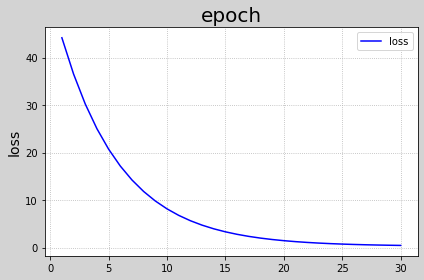

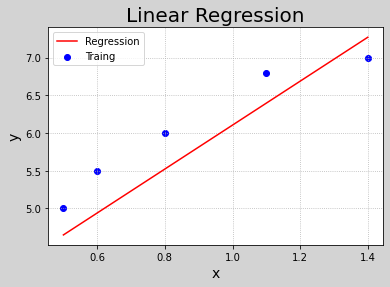

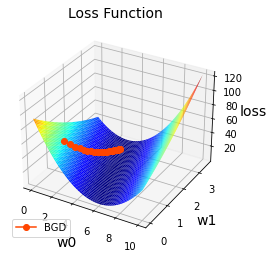

In [4]:
import numpy as np
import matplotlib.pyplot as mp
from mpl_toolkits.mplot3d import axes3d
import sklearn.preprocessing as sp

# 训练数据集
train_x = np.array([0.5, 0.6, 0.8, 1.1, 1.4])  # 输入集
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])  # 输出集

n_epochs = 30  # 迭代次数
l_rate = 0.01  # 学习率
epochs = []  # 记录迭代次数
losses = []  # 记录损失值

w0, w1 = [1], [1]  # 模型初始值

for i in range(1, n_epochs + 1):
    epochs.append(i)  # 记录第几次迭代

    y = w0[-1] + w1[-1] * train_x  # 取出最新的w0,w1计算线性方程输出
    # 损失函数(均方差)
    loss = (((train_y - y)**2).sum()) / 2
    losses.append(loss)  # 记录每次迭代的损失值

    print("%d: w0=%f, w1=%f, loss=%f" % (i, w0[-1], w1[-1], loss))

    # 计算w0,w1的偏导数
    d0 = -(train_y - y).sum()
    d1 = -(train_x * (train_y - y)).sum()

    # 更新w0,w1
    w0.append(w0[-1] - (d0 * l_rate))
    w1.append(w1[-1] - (d1 * l_rate))


###################### 训练过程可视化 ######################
## 损失函数收敛过程
w0 = np.array(w0[:-1])
w1 = np.array(w1[:-1])

mp.figure("Losses", facecolor="lightgray")  # 创建一个窗体
mp.title("epoch", fontsize=20)
mp.ylabel("loss", fontsize=14)
mp.grid(linestyle=":")  # 网格线：虚线
mp.plot(epochs, losses, c="blue", label="loss")
mp.legend()  # 图例
mp.tight_layout()  # 紧凑格式

## 显示模型直线
pred_y = w0[-1] + w1[-1] * train_x  # 根据x预测y
mp.figure("Linear Regression", facecolor="lightgray")
mp.title("Linear Regression", fontsize=20)
mp.xlabel("x", fontsize=14)
mp.ylabel("y", fontsize=14)
mp.grid(linestyle=":")
mp.scatter(train_x, train_y, c="blue", label="Traing")  # 绘制样本散点图
mp.plot(train_x, pred_y, c="red", label="Regression")
mp.legend()

# 显示梯度下降过程(复制粘贴即可，不需要编写)
# 计算损失函数曲面上的点 loss = f(w0, w1)
arr1 = np.linspace(0, 10, 500)  # 0~9间产生500个元素的均匀列表
arr2 = np.linspace(0, 3.5, 500)  # 0~3.5间产生500个元素的均匀列表

grid_w0, grid_w1 = np.meshgrid(arr1, arr2)  # 产生二维矩阵

flat_w0, flat_w1 = grid_w0.ravel(), grid_w1.ravel()  # 二维矩阵扁平化
loss_metrix = train_y.reshape(-1, 1)  # 生成误差矩阵（-1,1）表示自动计算维度
outer = np.outer(train_x, flat_w1)  # 求外积（train_x和flat_w1元素两两相乘的新矩阵）
# 计算损失：((w0 + w1*x - y)**2)/2
flat_loss = (((flat_w0 + outer - loss_metrix) ** 2).sum(axis=0)) / 2
grid_loss = flat_loss.reshape(grid_w0.shape)

mp.figure('Loss Function')
ax = mp.axes(projection='3d')
mp.title('Loss Function', fontsize=14)
ax.set_xlabel('w0', fontsize=14)
ax.set_ylabel('w1', fontsize=14)
ax.set_zlabel('loss', fontsize=14)
ax.plot_surface(grid_w0, grid_w1, grid_loss, rstride=10, cstride=10, cmap='jet')
ax.plot(w0, w1, losses, 'o-', c='orangered', label='BGD', zorder=5)
mp.legend(loc='lower left')

mp.show()

coef_: [2.2189781]
intercept_: 4.107299270072994


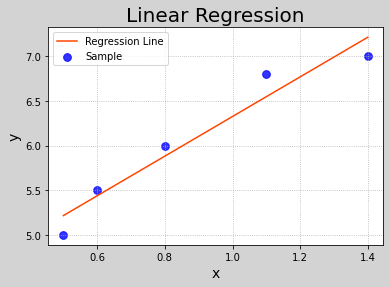

In [6]:
# 利用LinearRegression实现线性回归
import numpy as np
import sklearn.linear_model as lm  # 线性模型# 线性模型
import sklearn.metrics as sm  # 模型性能评价模块
import matplotlib.pyplot as mp

train_x = np.array([[0.5], [0.6], [0.8], [1.1], [1.4]])  # 输入集
train_y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])  # 输出集

# 创建线性回归器
line_model = lm.LinearRegression()
# 用已知输入、输出数据集训练回归器
line_model.fit(train_x, train_y)
# 根据训练模型预测输出
pred_y = line_model.predict(train_x)

print("coef_:", line_model.coef_)  # 系数
print("intercept_:", line_model.intercept_)  # 截距

# 可视化回归曲线
mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')

# 绘制样本点
mp.scatter(train_x, train_y, c='blue', alpha=0.8, s=60, label='Sample')

# 绘制拟合直线
mp.plot(
    train_x,  # x坐标数据
    pred_y,  # y坐标数据
    c='orangered',
    label='Regression Line')

mp.legend()  # 左上角的图例
mp.show()

### 决策树-随机森林

#### 决策树分类


训练集正确率： 0.9523809523809523
测试集正确率： 0.6
(2500, 2)
x_show = 
 [[4.3        2.        ]
 [4.37346939 2.        ]
 [4.44693878 2.        ]
 ...
 [7.75306122 4.4       ]
 [7.82653061 4.4       ]
 [7.9        4.4       ]]
(2500,)
[0 0 0 ... 2 2 2]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]
 [0 0 0 ... 2 2 2]]


C:\Users\utsuk\AppData\Local\Temp\ipykernel_24332\3076338488.py:91: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示


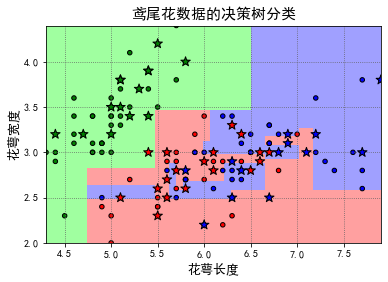

[0 2 2 0 2 2 1 0 0 2 2 0 1 2 1 0 2 1 0 0 1 0 2 0 2 1 0 0 1 1 2 2 2 2 1 0 1
 0 2 1 2 0 1 1 1]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0 1 2 2 0 2 2 1]
准确度: 60.00%
1  测试集错误率: 44.44%
2  测试集错误率: 40.00%
3  测试集错误率: 20.00%
4  测试集错误率: 24.44%
5  测试集错误率: 24.44%
6  测试集错误率: 26.67%
7  测试集错误率: 35.56%
8  测试集错误率: 40.00%
9  测试集错误率: 37.78%
10  测试集错误率: 40.00%
11  测试集错误率: 35.56%
12  测试集错误率: 35.56%
13  测试集错误率: 37.78%
14  测试集错误率: 40.00%


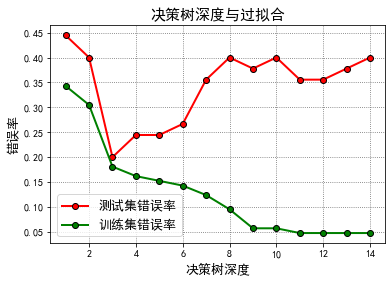

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
import pydotplus

mpl.rcParams['font.sans-serif'] = ['simHei']
mpl.rcParams['axes.unicode_minus'] = False

iris_feature_E = 'sepal length', 'sepal width', 'petal length', 'petal width'
iris_feature = '花萼长度', '花萼宽度', '花瓣长度', '花瓣宽度'
iris_class = 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica'

path = 'iris_classification/iris.data'  # 数据文件路径
data = pd.read_csv(path, header=None)
x = data[list(range(4))]
# y = pd.Categorical(data[4]).codes
y = LabelEncoder().fit_transform(data[4])
# 为了可视化，仅使用前两列特征
x = x[[0, 1]]
# x = x.iloc[:, :2]
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=1)

# 决策树参数估计
# min_samples_split = 10：如果该结点包含的样本数目大于10，则(有可能)对其分支
# min_samples_leaf = 10：若将某结点分支后，得到的每个子结点样本数目都大于10，则完成分支；否则，不进行分支
model = DecisionTreeClassifier(criterion='entropy')
model.fit(x_train, y_train)
y_train_pred = model.predict(x_train)
print('训练集正确率：', accuracy_score(y_train, y_train_pred))
y_test_hat = model.predict(x_test)  # 测试数据
print('测试集正确率：', accuracy_score(y_test, y_test_hat))

# 保存
# dot -Tpng my.dot -o my.png
# 1、输出
# with open('iris.dot', 'w') as f:
#     tree.export_graphviz(model, out_file=f, feature_names=iris_feature_E[0:2], class_names=iris_class,
#                          filled=True, rounded=True, special_characters=True)
tree.export_graphviz(model,
                     out_file='iris_classification/iris.dot',
                     feature_names=iris_feature_E[0:2],
                     class_names=iris_class,
                     filled=True,
                     rounded=True,
                     special_characters=True)
# 2、给定文件名
# tree.export_graphviz(model, out_file='iris.dot')
# tree.export_graphviz(model, out_file='iris.dot')
# 3、输出为pdf格式
dot_data = tree.export_graphviz(model,
                                out_file=None,
                                feature_names=iris_feature_E[0:2],
                                class_names=iris_class,
                                filled=True,
                                rounded=True,
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('iris_classification/iris.pdf')
f = open('iris_classification/iris.png', 'wb')
f.write(graph.create_png())
f.close()

# 画图
N, M = 50, 50  # 横纵各采样多少个值
x1_min, x2_min = x.min()
x1_max, x2_max = x.max()
t1 = np.linspace(x1_min, x1_max, N)
t2 = np.linspace(x2_min, x2_max, M)
x1, x2 = np.meshgrid(t1, t2)  # 生成网格采样点
x_show = np.stack((x1.flat, x2.flat), axis=1)  # 测试点
print(x_show.shape)
print('x_show = \n', x_show)

cm_light = mpl.colors.ListedColormap(['#A0FFA0', '#FFA0A0', '#A0A0FF'])
cm_dark = mpl.colors.ListedColormap(['g', 'r', 'b'])
y_show_hat = model.predict(x_show)  # 预测值
print(y_show_hat.shape)
print(y_show_hat)
y_show_hat = y_show_hat.reshape(x1.shape)  # 使之与输入的形状相同
print(y_show_hat)
plt.figure(facecolor='w')
plt.pcolormesh(x1, x2, y_show_hat, cmap=cm_light)  # 预测值的显示
plt.scatter(x_test[0],
            x_test[1],
            c=y_test.ravel(),
            edgecolors='k',
            s=100,
            zorder=10,
            cmap=cm_dark,
            marker='*')  # 测试数据
plt.scatter(x[0], x[1], c=y.ravel(), edgecolors='k', s=20,
            cmap=cm_dark)  # 全部数据
plt.xlabel(iris_feature[0], fontsize=13)
plt.ylabel(iris_feature[1], fontsize=13)
plt.xlim(x1_min, x1_max)
plt.ylim(x2_min, x2_max)
plt.grid(b=True, ls=':', color='#606060')
plt.title('鸢尾花数据的决策树分类', fontsize=15)
plt.show()

# 训练集上的预测结果
y_test = y_test.reshape(-1)
print(y_test_hat)
print(y_test)
result = (y_test_hat == y_test)  # True则预测正确，False则预测错误
acc = np.mean(result)
print('准确度: %.2f%%' % (100 * acc))

# 过拟合：错误率
depth = np.arange(1, 15)
err_train_list = []
err_test_list = []
clf = DecisionTreeClassifier(criterion='entropy')
for d in depth:
    clf.set_params(max_depth=d)
    clf.fit(x_train, y_train)
    y_train_pred = clf.predict(x_train)
    err_train = 1 - accuracy_score(y_train, y_train_pred)
    err_train_list.append(err_train)
    y_test_pred = clf.predict(x_test)
    err_test = 1 - accuracy_score(y_test, y_test_pred)
    err_test_list.append(err_test)
    print(d, ' 测试集错误率: %.2f%%' % (100 * err_test))
plt.figure(facecolor='w')
plt.plot(depth,
         err_test_list,
         'ro-',
         markeredgecolor='k',
         lw=2,
         label='测试集错误率')
plt.plot(depth,
         err_train_list,
         'go-',
         markeredgecolor='k',
         lw=2,
         label='训练集错误率')
plt.xlabel('决策树深度', fontsize=13)
plt.ylabel('错误率', fontsize=13)
plt.legend(loc='lower left', fontsize=13)
plt.title('决策树深度与过拟合', fontsize=15)
plt.grid(b=True, ls=':', color='#606060')
plt.show()

## 代码相关

### 存储-读取模型


训练完成.
保存模型完成.
加载模型完成.


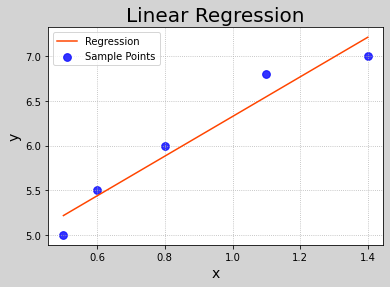

In [3]:
import numpy as np
import sklearn.linear_model as lm  # 线性模型
import sklearn.metrics as sm  # 模型性能评价模块
import matplotlib.pyplot as mp
import pickle

x = np.array([[0.5], [0.6], [0.8], [1.1], [1.4]])  # 输入集
y = np.array([5.0, 5.5, 6.0, 6.8, 7.0])  # 输出集

# 创建线性回归器
model = lm.LinearRegression()
# 用已知输入、输出数据集训练回归器
model.fit(x, y)

print("训练完成.")

# 保存训练后的模型
with open('linear_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("保存模型完成.")


######################### 加载模型 #########################
# 上面通过训练数据x,y 训练好了 x -> y 的线性回归模型
# 下面加载模型, 再给出测试数据 x, 查看模型预测结果直线与原始数据 (x,y) 的拟合度
with open('linear_model.pkl', 'rb') as f:
    model = pickle.load(f)
    print("加载模型完成.")

# 根据加载的模型预测输出
pred_y = model.predict(x)

# 可视化回归曲线
mp.figure('Linear Regression', facecolor='lightgray')
mp.title('Linear Regression', fontsize=20)
mp.xlabel('x', fontsize=14)
mp.ylabel('y', fontsize=14)
mp.tick_params(labelsize=10)
mp.grid(linestyle=':')
mp.scatter(x, y, c='blue', alpha=0.8, s=60, label='Sample Points')

mp.plot(x, pred_y, c='orangered', label='Regression')

mp.legend()
mp.show()

## 信息论

### 两点分布信息熵


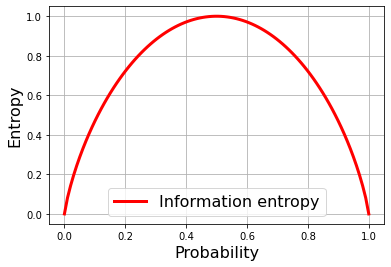

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# 因为 ln0 无定义, 用此值模拟趋近 0
eps = 1e-5

# probability
p = np.linspace(eps, 1 - eps, 100)

# Information entropy
h = -(1 - p) * np.log2(1 - p) - p * np.log2(p)

plt.plot(p, h, label='Information entropy', color='red', lw=3)
plt.xlabel('Probability', fontsize=16)
plt.ylabel('Entropy', fontsize=16)
plt.legend(loc='best', fontsize=16)
plt.grid(True)
plt.show()

# 结果中信息熵的峰值取决于 log 底数, e为底时峰值为0.7左右, 2为底峰值为1

### 基尼系数与-ln


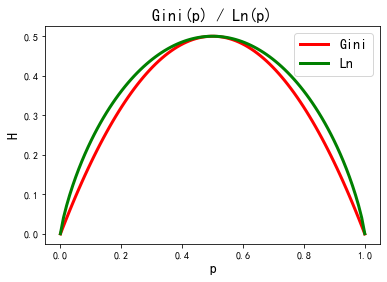

In [4]:
import numpy as np
import matplotlib.pyplot as plt

eps = 1e-4
p = np.linspace(eps, 1 - eps, 100)
h = -(1 - p) * np.log2(1 - p) - p * np.log2(p)
gini = 2 * (1 - p) * p

plt.plot(p, gini, 'r-', lw=3)
plt.plot(p, h / 2, 'g-', lw=3)
plt.title('Gini(p) / Ln(p)', fontsize=16)
plt.xlabel('p', fontsize=14)
plt.ylabel('H', fontsize=14)
plt.legend(['Gini', 'Ln'], loc='best', fontsize=14)
plt.show()

<a>![分割线](https://cdn.jsdelivr.net/gh/Weidows/Images/img/divider.png)</a>

## 借物表

<a name='cite_note-1' href='#cite_ref-1'>[1]</a>: https://discover304.top/
